<font color="blue" size=5><b>Voting Ensemble</b></font>

In [6]:
import numpy as np
import pandas as pd


<font color="red" size=3><b>Voting Classifier</b></font>

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.sample(5))


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
96                5.7               2.9                4.2               1.3
74                6.4               2.9                4.3               1.3
68                6.2               2.2                4.5               1.5
70                5.9               3.2                4.8               1.8
8                 4.4               2.9                1.4               0.2


In [11]:
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


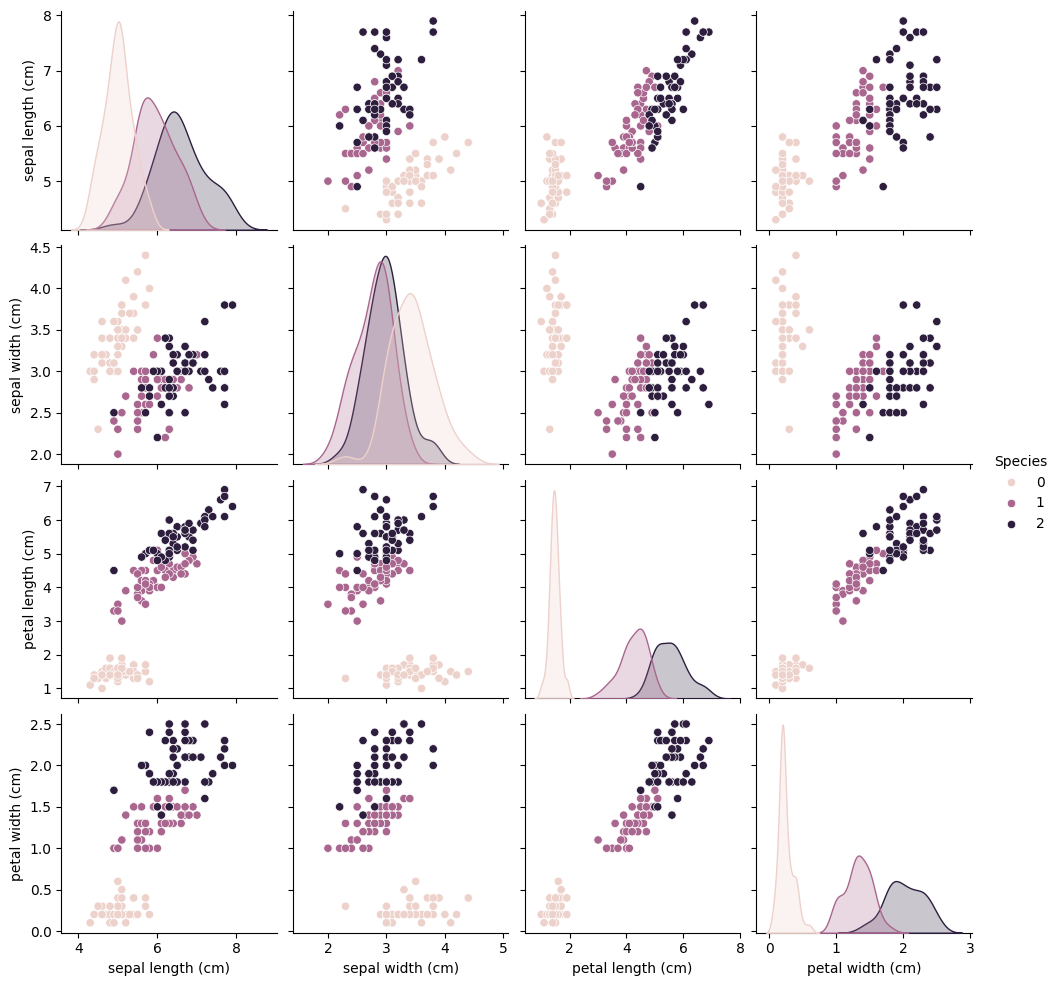

In [12]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [15]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

lr 0.97
rf 0.96
knn 0.97


In [19]:
from sklearn.ensemble import VotingClassifier

<font color="red" size=3><b>Hard Voting</b></font>

In [20]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.97


<font color="red" size=3><b>Soft Voting</b></font>

In [21]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.96


<font color="red" size=3><b>Voting Regressor</b></font>

In [33]:
import seaborn as sns
tips = sns.load_dataset('tips')
df1 = pd.DataFrame(tips)
df1.sample(5)

,total_bill,tip,sex,smoker,day,time,size
113,23.95,2.55,Male,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
27,12.69,2.00,Male,No,Sat,Dinner,2
154,19.77,2.00,Male,No,Sun,Dinner,4


In [34]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [37]:

df1 = pd.get_dummies(df1, columns=['sex', 'smoker', 'day', 'time'])



In [38]:
df1.sample(5)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
229,22.12,2.88,2,False,True,True,False,False,False,True,False,False,True
40,16.04,2.24,3,True,False,False,True,False,False,True,False,False,True
241,22.67,2.00,2,True,False,True,False,False,False,True,False,False,True
137,14.15,2.00,2,False,True,False,True,True,False,False,False,True,False
53,9.94,1.56,2,True,False,False,True,False,False,False,True,False,True


In [39]:
x1 = df1.drop(['tip'],axis=1)
y1 = df1['tip']

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [41]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [29]:
estimators1 = [('lr',lr),('dt',dt),('svr',svr)]

In [45]:
for estimator in estimators1:
  scores = cross_val_score(estimator[1],x1,y1,scoring='r2',cv=10, error_score='raise')
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.32
dt -0.11
svr 0.35


In [43]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.18


**Note** If a model has an accuracy above 0.51, its predictions are reliable enough to contribute to the ensemble's overall performance. Models with accuracy below 0.51 are considered too unreliable to contribute to the ensemble.If a model has an R² above a certain threshold (e.g., 0.7), it's considered to be performing well (for regression)

